Regression Algorithms compared

In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.stats import randint
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
# reading
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/housing_prices.csv") 

In [3]:
df = df.set_index('Id')
df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [4]:
y = df['SalePrice'].copy()
X = df.drop(columns=['SalePrice']).copy()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=1230000)

### preprocessing pipeline

- Preprocessing pipelines: Those pipelines only transform the predictor features (the X) by filling NAs, encoding categorical features, scaling, etc. You always have to fit them with X_train. Then, you can call the .transform() method to transform both the X_train and the X_test. (Sometimes, you fit and transform X_train in a single step, by using the .fit_transform() method, but you're still performing these 2 separate steps). Any time that you call transform() you get as an output the transformed data, X_train or X_test.

In [6]:
X_num_col = X_train.select_dtypes(include="number").copy().columns
X_cat_col = X_train.select_dtypes(exclude="number").copy().columns

In [7]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    MinMaxScaler())
    #StandardScaler())

cat_pipe = make_pipeline(
    #SimpleImputer(strategy="constant", fill_value='NaN'),
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(drop="first", handle_unknown="ignore", sparse=False))
    #OneHotEncoder(drop="first"))

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", num_pipe, X_num_col),
        ("cat_pipe", cat_pipe, X_cat_col)])

1. Create your preprocessing pipeline, let's say it's full_pipeline.
2. Fit it to the train set: full_pipeline.fit(X_train)
3. Transform the train set: X_train_preprocessed = full_pipeline.transform(X_train)
4. Transform the test set: X_test_preprocessed = full_pipeline.transform(X_test)
Note that so far we have not needed neither the y_train nor the y_test. This is because we are not modelling yet. We are just preprocessing data (cleaning, transforming, wrangling, preparing, imputing, encoding... only the predictors! not the target!)
5. Fit a model to the preprocessed train set:

In [9]:
preprocessor.fit_transform(X_train).shape

(1168, 241)

In [10]:
preprocessor.fit_transform(X_test).shape

(292, 202)

In [11]:
performances = {}

## 3. Quick baseline models (baseline for performance)

In [12]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

#dt = Decision tree
full_pipe_dt = make_pipeline ( preprocessor, DecisionTreeClassifier())

full_pipe_dt.fit(X_train, y_train)

tree_pred = full_pipe_dt.predict(X_test)

performances["baseline_tree"]= r2_score(y_test, tree_pred)
performances

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [5, 14, 15, 27] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


{'baseline_tree': 0.4388112286138136}

In [13]:
# K Nearest neighbors

from sklearn.neighbors import KNeighborsRegressor
full_pipe_kn = make_pipeline(
    preprocessor,
    KNeighborsRegressor(n_neighbors=3))

full_pipe_kn.fit(X_train, y_train)

kn_pred = full_pipe_kn.predict(X_test)

performances["baseline_kn"]= r2_score(y_test, kn_pred)
performances

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [5, 14, 15, 27] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


{'baseline_kn': 0.7013317730745241, 'baseline_tree': 0.4388112286138136}

In [14]:
# LR
from sklearn.linear_model import LinearRegression
full_pipe_LR = make_pipeline(
    preprocessor,
    LinearRegression())

full_pipe_LR.fit(X_train, y_train)

LR_pred = full_pipe_LR.predict(X_test)

performances["baseline_LR"]= r2_score(y_test, LR_pred)
performances

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [5, 14, 15, 27] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


{'baseline_LR': -1.0612376278393466e+17,
 'baseline_kn': 0.7013317730745241,
 'baseline_tree': 0.4388112286138136}

PCA


In [15]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

full_pipe_dt = make_pipeline(
    preprocessor,
    PCA(n_components=0.95),
    DecisionTreeClassifier(max_depth=5))

full_pipe_dt.fit(X_train, y_train)

tree_pred = full_pipe_dt.predict(X_test)

performances["PCA95_tree"]= r2_score(y_test, tree_pred)
performances

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [5, 14, 15, 27] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


{'PCA95_tree': 0.2162898659548005,
 'baseline_LR': -1.0612376278393466e+17,
 'baseline_kn': 0.7013317730745241,
 'baseline_tree': 0.4388112286138136}

In [16]:
# K Nearest neighbors
from sklearn.neighbors import KNeighborsRegressor
full_pipe_kn = make_pipeline(
    preprocessor,
    PCA(n_components=0.95),
    KNeighborsRegressor(n_neighbors=3))

full_pipe_kn.fit(X_train, y_train)

kn_pred = full_pipe_kn.predict(X_test)

performances["PCA95_kn"]= r2_score(y_test, kn_pred)
performances

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [5, 14, 15, 27] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


{'PCA95_kn': 0.6793383451055091,
 'PCA95_tree': 0.2162898659548005,
 'baseline_LR': -1.0612376278393466e+17,
 'baseline_kn': 0.7013317730745241,
 'baseline_tree': 0.4388112286138136}

In [17]:
# LR
from sklearn.linear_model import LinearRegression
full_pipe_LR = make_pipeline(
    preprocessor,
    PCA(n_components=0.95),
    LinearRegression())

full_pipe_LR.fit(X_train, y_train)

LR_pred = full_pipe_LR.predict(X_test)

performances["PCA95_LR"]= r2_score(y_test, LR_pred)
performances

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [5, 14, 15, 27] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


{'PCA95_LR': 0.858420955718596,
 'PCA95_kn': 0.6793383451055091,
 'PCA95_tree': 0.2162898659548005,
 'baseline_LR': -1.0612376278393466e+17,
 'baseline_kn': 0.7013317730745241,
 'baseline_tree': 0.4388112286138136}

More about pca


In [18]:
preprocessor.fit(X_train)

X_scaled = preprocessor.transform(X_train)

pca = PCA(n_components=None) # pick number of components
X_reduced = pca.fit_transform(X_scaled)
np.round(pca.explained_variance_ratio_, 4)*100

array([1.648e+01, 6.550e+00, 4.530e+00, 3.210e+00, 2.980e+00, 2.880e+00,
       2.550e+00, 2.380e+00, 2.300e+00, 2.150e+00, 2.110e+00, 1.850e+00,
       1.790e+00, 1.770e+00, 1.660e+00, 1.560e+00, 1.550e+00, 1.360e+00,
       1.310e+00, 1.270e+00, 1.200e+00, 1.170e+00, 1.090e+00, 1.030e+00,
       1.010e+00, 9.300e-01, 9.000e-01, 8.800e-01, 8.400e-01, 8.100e-01,
       7.900e-01, 7.800e-01, 7.600e-01, 7.000e-01, 6.800e-01, 6.500e-01,
       6.200e-01, 6.100e-01, 5.900e-01, 5.700e-01, 5.500e-01, 5.300e-01,
       5.200e-01, 5.100e-01, 5.000e-01, 4.800e-01, 4.700e-01, 4.500e-01,
       4.300e-01, 4.100e-01, 4.000e-01, 3.900e-01, 3.800e-01, 3.700e-01,
       3.600e-01, 3.500e-01, 3.500e-01, 3.400e-01, 3.300e-01, 3.200e-01,
       3.000e-01, 2.900e-01, 2.900e-01, 2.800e-01, 2.700e-01, 2.700e-01,
       2.700e-01, 2.500e-01, 2.500e-01, 2.500e-01, 2.400e-01, 2.400e-01,
       2.300e-01, 2.300e-01, 2.200e-01, 2.200e-01, 2.100e-01, 2.100e-01,
       2.000e-01, 2.000e-01, 2.000e-01, 1.900e-01, 

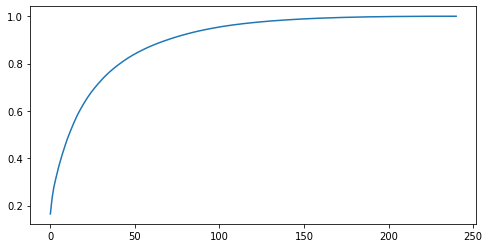

In [19]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(cumsum, label = "Explained variance");

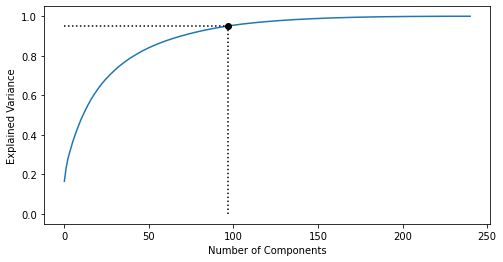

In [20]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(cumsum, label = "Explained variance");

d = np.argmax(cumsum >= 0.95) # with how many components do we get 0.95 of the variance

ax.plot([d, d], [0, 0.95], "k:")
ax.plot([0, d], [0.95, 0.95], "k:")
ax.plot(d, 0.95, "ko")

ax.set_ylabel("Explained Variance")
ax.set_xlabel("Number of Components");

In [21]:
np.argmax(cumsum >= 0.95) # with how many components do we get 0.95 of the variance

97